In [8]:
import json

import pandas as pd
from sqlalchemy import create_engine, text
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.rcParams["figure.figsize"] = (16, 9)

## Criação de conexão com o banco de dados

In [9]:
with open('../constants.json') as CONSTANTS_FILE:
    CONSTANTS = json.load(CONSTANTS_FILE)
    
DB_ENGINE = create_engine(f'postgresql+psycopg2://{CONSTANTS["DB_USER"]}:{CONSTANTS["DB_PASSWORD"]}@{CONSTANTS["DB_IP"]}:{CONSTANTS["DB_PORT"]}/{CONSTANTS["DB_NAME"]}', future=True)
CONN = DB_ENGINE.connect()

## Recuperação de dados do banco

Para a recuperação de dados, consultas SQL foram feitas. Além das consultas, foi necessário informar ao Pandas quais colunas eram datas. Além disso, adicionei a coluna de idade para os dados de usuário.

In [10]:
WINE_DATA = pd.read_sql(text('SELECT * FROM wines'), CONN)
USER_DATA = pd.read_sql(text('SELECT * FROM users'), CONN, parse_dates=['birthday'])
PURCHASE_DATE = pd.read_sql(text('SELECT * FROM purchases'), CONN, parse_dates=['date'])

USER_DATA['age'] = 2022 - pd.DatetimeIndex(USER_DATA['birthday']).year

## Conteúdo das tabelas

In [5]:
WINE_DATA

,id,name,is_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,price
0,0,White Claret,0,7.00000,0.17000,0.74000,12.80000,0.04500,24.00000,126.00000,0.99420,3.26000,0.38000,12.20000,8,629.79000
1,1,Red Boal or Bual,1,7.70000,0.64000,0.21000,2.20000,0.07700,32.00000,133.00000,0.99560,3.27000,0.45000,9.90000,5,665.47000
2,2,White Fumé Blanc,0,6.80000,0.39000,0.34000,7.40000,0.02000,38.00000,133.00000,0.99212,3.18000,0.44000,12.00000,7,483.00000
3,3,White Trebbiano,0,6.30000,0.28000,0.47000,11.20000,0.04000,61.00000,183.00000,0.99592,3.12000,0.51000,9.50000,6,440.72000
4,4,White Pinot Blanc,0,7.40000,0.35000,0.20000,13.90000,0.05400,63.00000,229.00000,0.99888,3.11000,0.50000,8.90000,6,458.45000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,White Sherry,0,7.60000,0.32000,0.58000,16.75000,0.05000,43.00000,163.00000,0.99990,3.15000,0.54000,9.20000,5,394.45000
6493,6493,White Sauterns,0,5.60000,0.28000,0.27000,3.90000,0.04300,52.00000,158.00000,0.99202,3.35000,0.44000,10.70000,7,480.52000
6494,6494,White Tokay,0,6.40000,0.37000,0.20000,5.60000,0.11700,61.00000,183.00000,0.99459,3.24000,0.43000,9.50000,5,339.10000
6495,6495,White Müller-Thurgau,0,6.50000,0.26000,0.50000,8.00000,0.05100,46.00000,197.00000,0.99536,3.18000,0.47000,9.50000,5,397.43000


In [6]:
USER_DATA

,id,name,email,birthday,gender,age
0,0,Victoria Patel,brownlisa@example.net,1910-06-11,0,112
1,1,Vincent Morris,dianediaz@example.com,2002-09-15,1,20
2,2,Jennifer Shelton,kharvey@example.com,1957-05-29,0,65
3,3,Jason Gillespie,estradatyler@example.net,1946-11-21,1,76
4,4,Mariah Carroll,james00@example.com,1933-07-14,0,89
...,...,...,...,...,...,...
995,995,Kathy Peterson,griffithbryan@example.com,1939-01-07,0,83
996,996,Frank Harrington,robert12@example.com,1920-01-06,1,102
997,997,Maria Graves,ryanbrown@example.net,1979-12-28,0,43
998,998,Catherine Powers,cynthia84@example.com,1995-11-25,0,27


In [70]:
PURCHASE_DATE

,id,date,rating,user_id,wine_id
0,0,2022-03-06,0.20080,530,292
1,1,2022-02-21,0.46900,111,912
2,2,2022-02-01,0.22860,853,3179
3,3,2022-01-29,0.18450,780,5682
4,4,2022-01-17,0.80640,247,3571
...,...,...,...,...,...
9995,9995,2022-03-01,0.07610,239,1137
9996,9996,2022-02-19,0.68320,772,2869
9997,9997,2022-02-01,0.18690,461,3148
9998,9998,2022-02-16,0.16020,151,5370


## Análise dos atributos numéricos

In [11]:
WINE_DATA.drop(columns=['id', 'name', 'is_red', 'quality', 'price']).describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
count,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000,6497.00000
mean,7.21531,0.33967,0.31863,5.44324,0.05603,30.52532,115.74457,0.99470,3.21850,0.53127,10.49180
std,1.29643,0.16464,0.14532,4.75780,0.03503,17.74940,56.52185,0.00300,0.16079,0.14881,1.19271
min,3.80000,0.08000,0.00000,0.60000,0.00900,1.00000,6.00000,0.98711,2.72000,0.22000,8.00000
25%,6.40000,0.23000,0.25000,1.80000,0.03800,17.00000,77.00000,0.99234,3.11000,0.43000,9.50000
50%,7.00000,0.29000,0.31000,3.00000,0.04700,29.00000,118.00000,0.99489,3.21000,0.51000,10.30000
75%,7.70000,0.40000,0.39000,8.10000,0.06500,41.00000,156.00000,0.99699,3.32000,0.60000,11.30000
max,15.90000,1.58000,1.66000,65.80000,0.61100,289.00000,440.00000,1.03898,4.01000,2.00000,14.90000


In [65]:
USER_DATA[['gender', 'age']].describe()

,gender,age
count,1000.00000,1000.00000
mean,0.50300,58.34600
std,0.50024,33.09776
min,0.00000,0.00000
25%,0.00000,29.00000
50%,1.00000,58.00000
75%,1.00000,88.00000
max,1.00000,116.00000


In [67]:
PURCHASE_DATE[['rating']].describe()

,rating
count,10000.00000
mean,0.50136
std,0.28939
min,0.00010
25%,0.24780
50%,0.50215
75%,0.75113
max,0.99980


[]

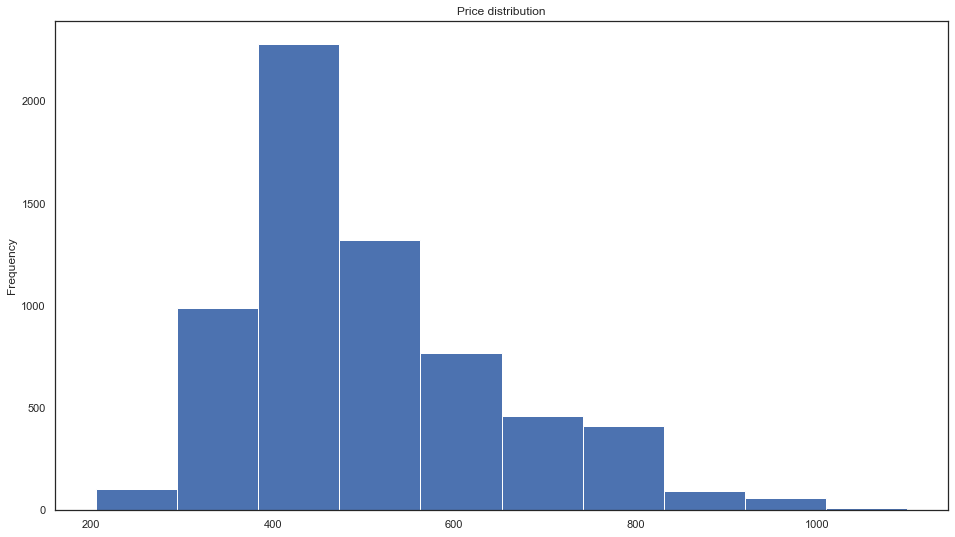

In [15]:
WINE_DATA.price.plot(kind='hist')
plt.title('Price distribution')
plt.plot()

[Text(0.5, 1.0, 'Wine correlation heatmap')]

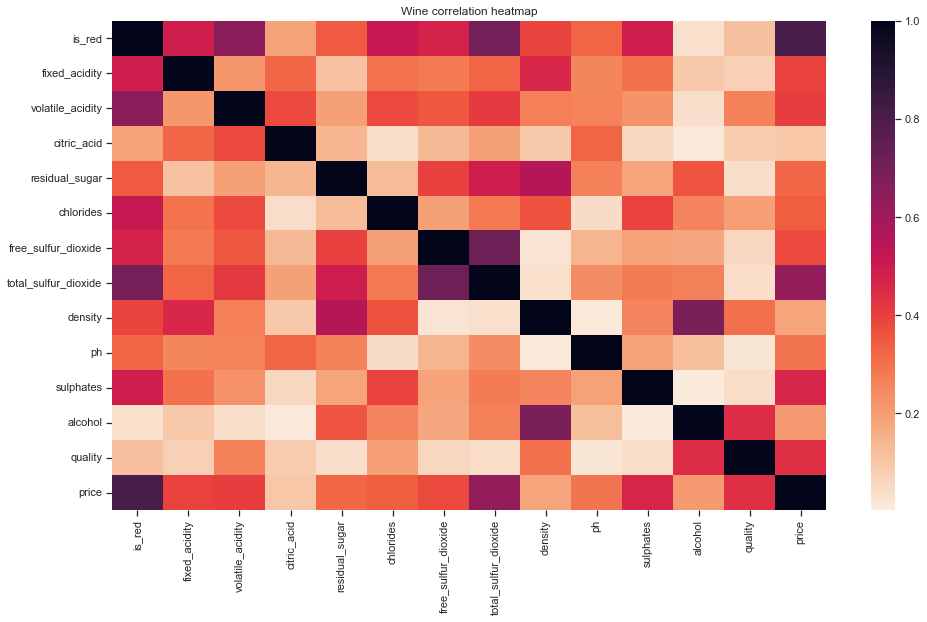

In [84]:
sns.heatmap(WINE_DATA.drop(columns=['id', 'name']).corr().abs(), cmap=sns.cm.rocket_r).set(title='Wine correlation heatmap')

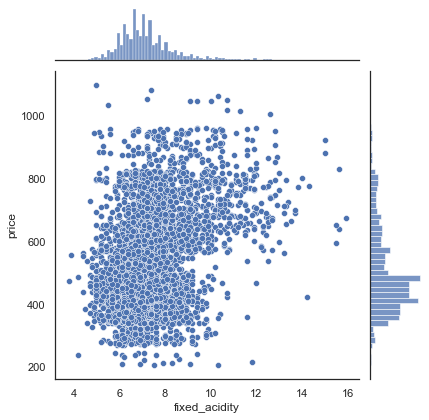

In [106]:
sns.jointplot(x='fixed_acidity', y='price', data=WINE_DATA)

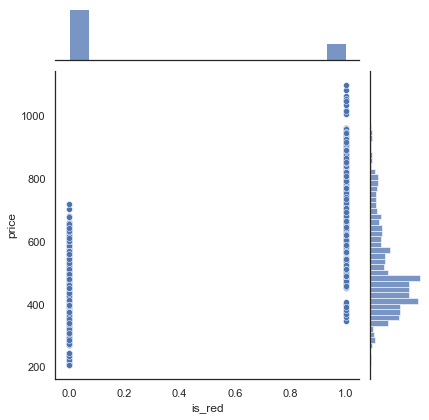

In [7]:
sns.jointplot(x='is_red', y='price', data=WINE_DATA)

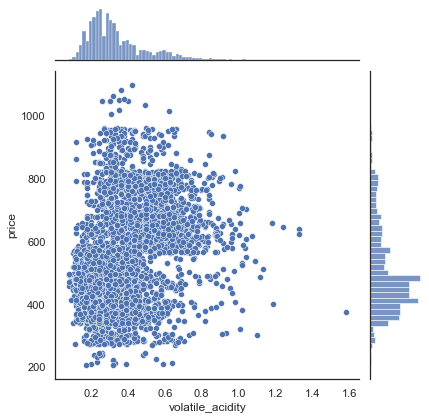

In [107]:
sns.jointplot(x='volatile_acidity', y='price', data=WINE_DATA)

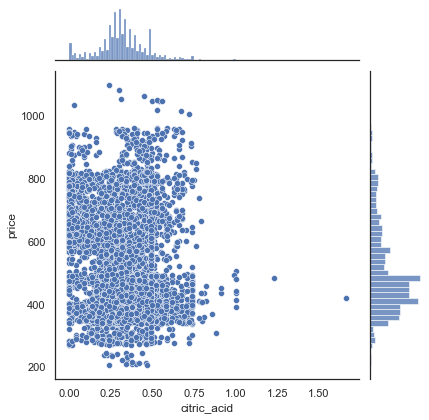

In [109]:
sns.jointplot(x='citric_acid', y='price', data=WINE_DATA)

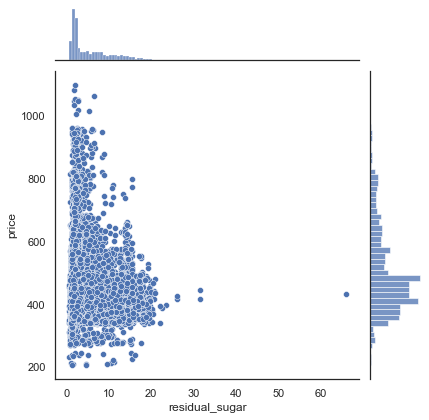

In [110]:
sns.jointplot(x='residual_sugar', y='price', data=WINE_DATA)

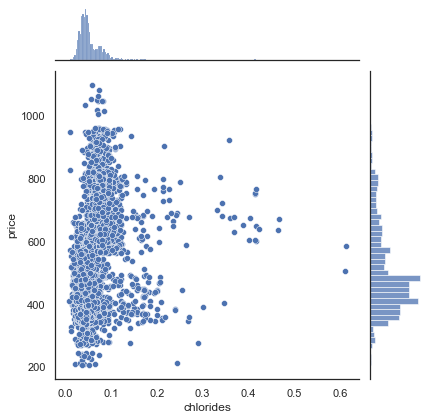

In [111]:
sns.jointplot(x='chlorides', y='price', data=WINE_DATA)

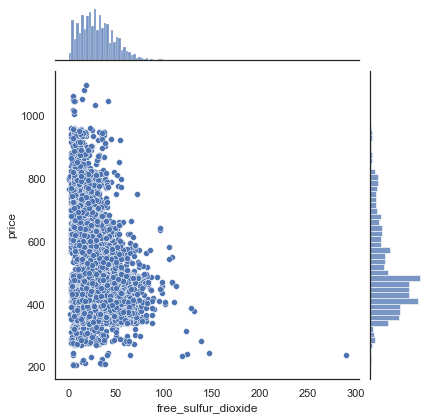

In [112]:
sns.jointplot(x='free_sulfur_dioxide', y='price', data=WINE_DATA)

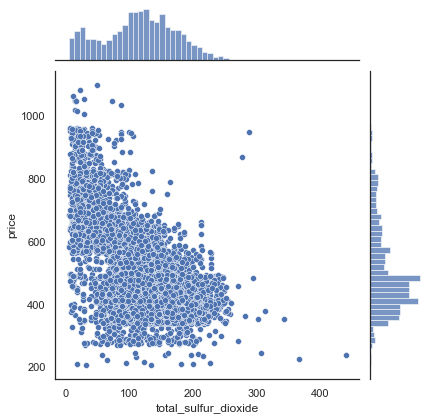

In [113]:
sns.jointplot(x='total_sulfur_dioxide', y='price', data=WINE_DATA)

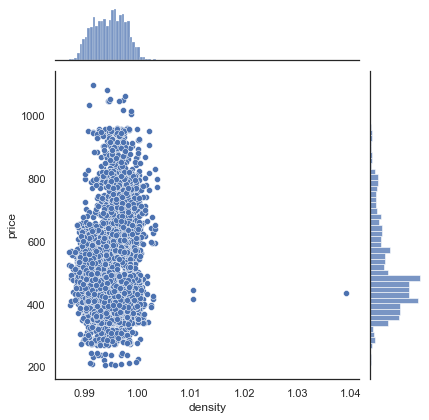

In [114]:
sns.jointplot(x='density', y='price', data=WINE_DATA)

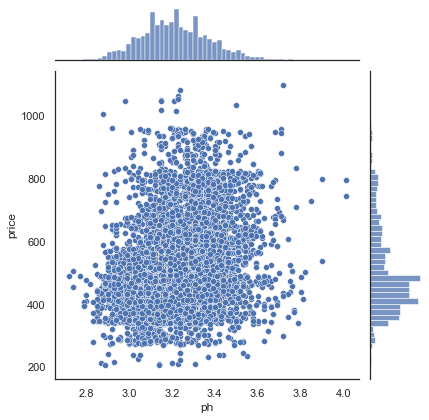

In [115]:
sns.jointplot(x='ph', y='price', data=WINE_DATA)

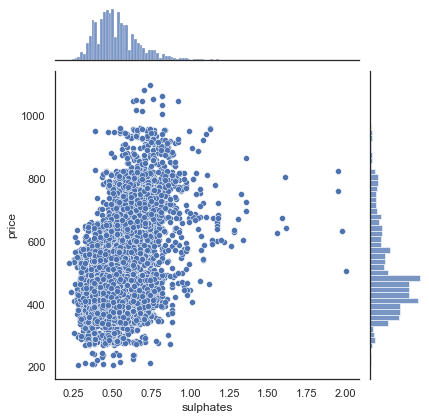

In [116]:
sns.jointplot(x='sulphates', y='price', data=WINE_DATA)

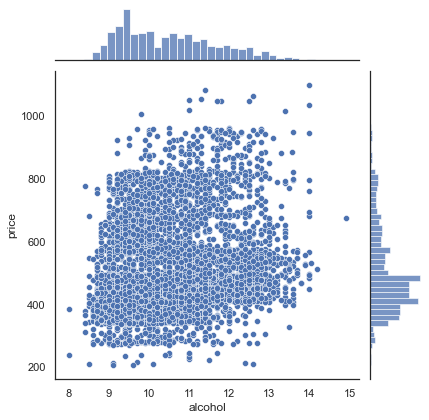

In [117]:
sns.jointplot(x='alcohol', y='price', data=WINE_DATA)

In [45]:
CONN.close()
DB_ENGINE.dispose()